The approximate period of the cycle is 135 months.

Using FFT to find period of sunspots cycle: 


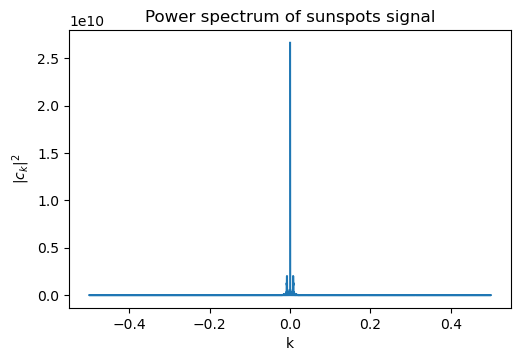

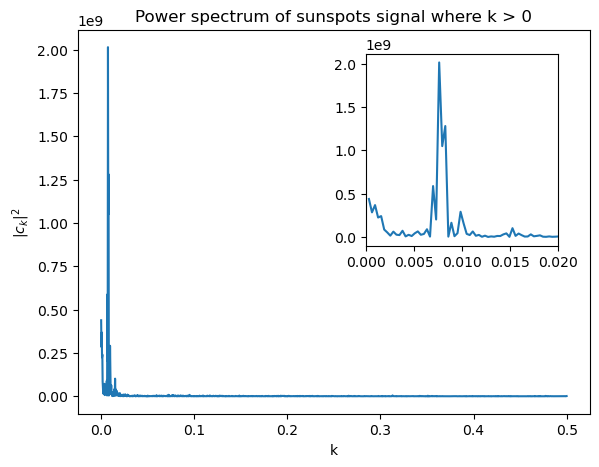


The period of the sunspots cycle when k is approximately 0.007 is:  142.85714285714286 months

This is close to the estimate made by visual inspection at the beginning of this task.


In [57]:
# The approximate period of the cycle is 135 months

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import *

print("The approximate period of the cycle is 135 months.")

sig = np.loadtxt("sunspots.txt")
mons = sig[:,0]
spots = sig[:,1]

print("\nUsing FFT to find period of sunspots cycle: ")

spots_fft = fftpack.fft(spots)
ck2 = (np.abs(spots_fft))**2
k = fftpack.fftfreq(spots.size)

## Power spectrum of all k

fig1, axes1 = plt.subplots()
axes1.plot(k, ck2)
axes1.set_xlabel('k')
axes1.set_ylabel('$|c_k|^2$')
axes1.set_title('Power spectrum of sunspots signal');
fig1.tight_layout(pad=5)
plt.show();

## Power spectrum with k > 0

mask = np.where(k > 0)

fig2 = plt.figure()

axes2_1 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])
axes2_2 = fig2.add_axes([0.55, 0.45, 0.3, 0.4]) 

axes2_1.plot(k[mask], ck2[mask])
axes2_1.set_xlabel('k')
axes2_1.set_ylabel('$|c_k|^2$')
axes2_1.set_title('Power spectrum of sunspots signal where k > 0');

axes2_2.plot(k[mask], ck2[mask])
axes2_2.set_xlim([0, 0.02])
plt.show();

# Approximate value of k is 0.007
k_val = 0.007

T_val = 1/k_val
print("\nThe period of the sunspots cycle when k is approximately", k_val, "is: ", T_val, "months")
print("\nThis is close to the estimate made by visual inspection at the beginning of this task.")

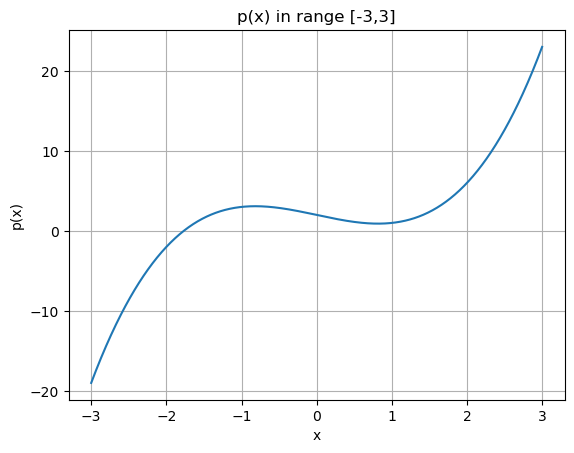


x0 for Newton-Raphson method is approximately -1.75

x0 =  -1.75
Iteration  1  : x_n+1 =  -1.76956521739130
Iteration  2  : x_n+1 =  -1.76929240769149
Iteration  3  : x_n+1 =  -1.76929235423863

The root of p(x) is  -1.76929235423863


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from numpy import *

def newton_method(f, x, x0):
    x_n = x0
    df = Derivative(f)
    i = 0
    print("\nx0 = ", x0)
    while True:
        f_xn = N(f.subs(x, x_n))
        df_xn = N(df.doit().subs(x, x_n))
        x_n1 = x_n - (f_xn / df_xn)
        i += 1
        print("Iteration ", i, " : x_n+1 = ", x_n1)
        if abs(x_n1 - x_n) < 0.00001:
            break
        else:
            x_n = x_n1
    return x_n1
        

x = Symbol('x', real=True)
p = x**3 - 2*x + 2
x_vec = linspace(-3,3,1000)
f = lambdify([x], p, 'numpy')
p_vec = f(x_vec)

fig, axes = plt.subplots()
axes.plot(x_vec, p_vec, label="p(x)")
axes.set_xlabel('x')
axes.set_ylabel('p(x)')
axes.set_title('p(x) in range [-3,3]');
axes.grid(True)
plt.show();

# x0 for Newton-Raphson method is approximately -1.75

print("\nx0 for Newton-Raphson method is approximately -1.75")

root = newton_method(p, x, -1.75)
print("\nThe root of p(x) is ", root)